## Import packages!

In [110]:
import numpy as np
import astropy.constants as const
import astropy.units as u
from cosmolopy import constants
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import barnes_hut as bh
import sys
%matplotlib inline

## Load data files containing initial positions of galaxies.

In [111]:
galaxy_init = 'galaxies0.npy'
galaxy_step = 'galaxies1.npy'
gal_past = np.load(galaxy_init)
gal_current = np.load(galaxy_step)
gal_global = gal_current

## Evolve the galaxy cluster! Do not run this cell unless you want to perform the simulation over again - it may take a few hours. If you only want to work with the data, it can be accessed from github (where you found this), and the post processing is below this cell!

0
10
20
30
40
50


KeyboardInterrupt: 

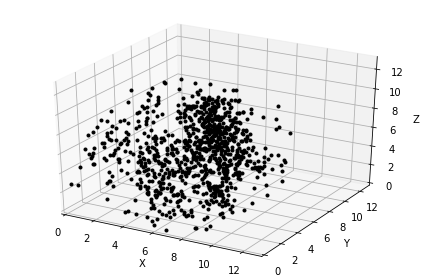

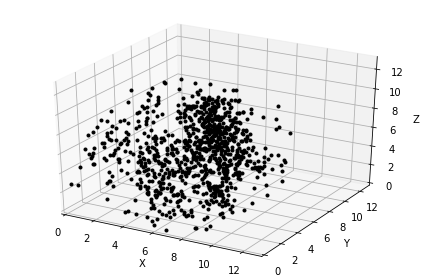

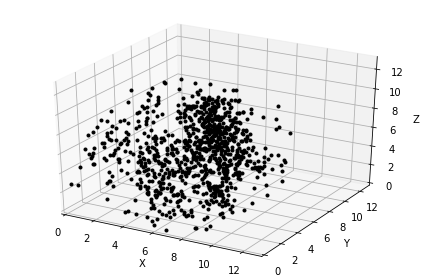

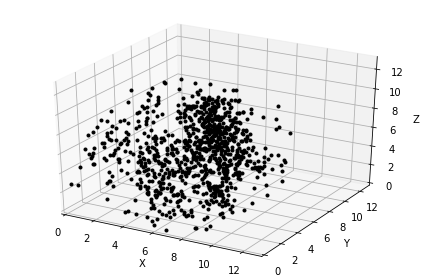

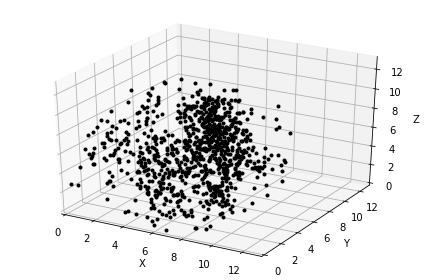

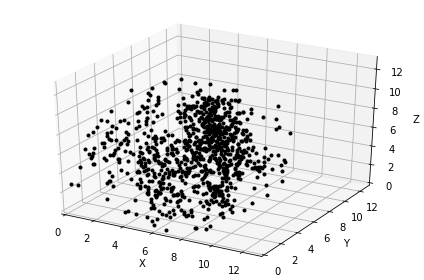

In [112]:
num_steps = 1000
mag_change = []
time = [0]
step_size = bh.step_size

for i in range(0, num_steps):
    
    change = abs(np.subtract(gal_current, gal_global))
    
    mag_change.append(np.max(np.sqrt(change*change)))
    time.append(time[i] + step_size)
    
    if mag_change[i] > 3:
        sys.exit("The simulation has advanced far enough that a particle \
             has moved a Mpc")
    
    ## Calculate the acceleration of each galaxy.
    accel = bh.calc_accel(gal_current, np.full(len(gal_current), 1e12))
    
    ## Update the positions of each galaxy.
    pos = bh.calc_position(gal_current, gal_past, accel)
    
    ## The current timestep will become the n-1 timestep.
    gal_past = gal_current
    
    ## The updated position will become the n timestep.
    gal_current = pos
    
    ## Every 100 iterations, output a plot of the data and the 
    ## positional data for post processing.
    if i % 10 == 0:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.set_xlim(0,13)
        ax.set_zlim(0,13)
        ax.set_ylim(0,13)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.tight_layout()
        ax.plot(gal_current[:,0], gal_current[:,1], gal_current[:,2], '.',color='k')
        plt.savefig('plots/galaxies_%06d.png' % i)
        
        np.savetxt('plots/galaxy_pos_%06d.txt' % i, gal_current)
        
        print(i)

## If we only want to work with the data and not rerun the simulation, we can plot from a datafile.

In [103]:
def plot_from_file(file_name, title, savename):
    '''
    Summary:
    Loads a date file and plots the galaxies within

    Parameters
    ----------
    file_name : str, name of the file containing the data.
    title : str, plot title
    savename : str, name of png that will be saved in the working directory.
    '''
    gals = np.genfromtxt('plots/' + file_name)
    #%matplotlib nbagg
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.set_xlim(0,13)
    ax.set_zlim(0,13)
    ax.set_ylim(0,13)
    ax.set_xlabel('X (Mpc)')
    ax.set_ylabel('Y (Mpc)')
    ax.set_zlabel('Z (Mpc)')
    ax.set_title(title)
    plt.tight_layout()
    ax.plot(gals[:,0], gals[:,1], gals[:,2], '.', color='k')
    ax.scatter(gals[20,0], gals[20,1], gals[20,2], '.', color='r')
    plt.savefig(savename)
    plt.show()

<IPython.core.display.Javascript object>


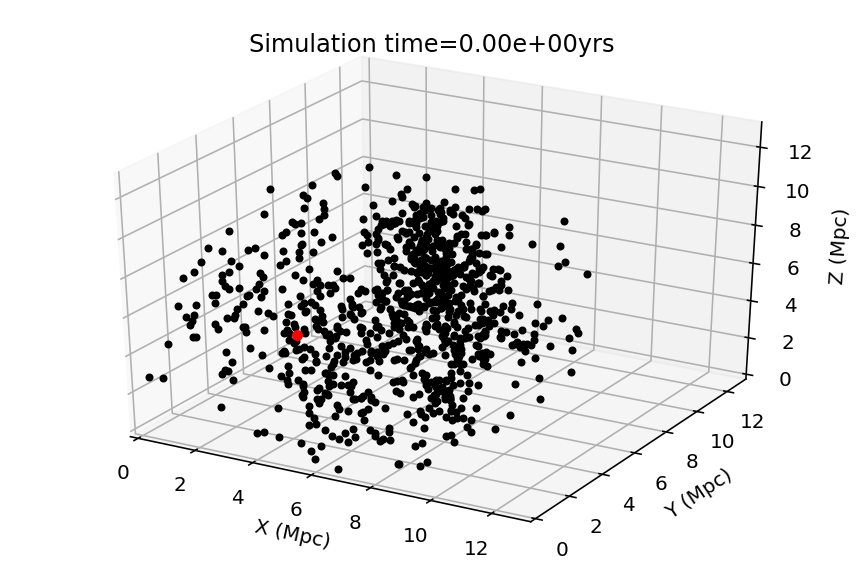

<IPython.core.display.Javascript object>


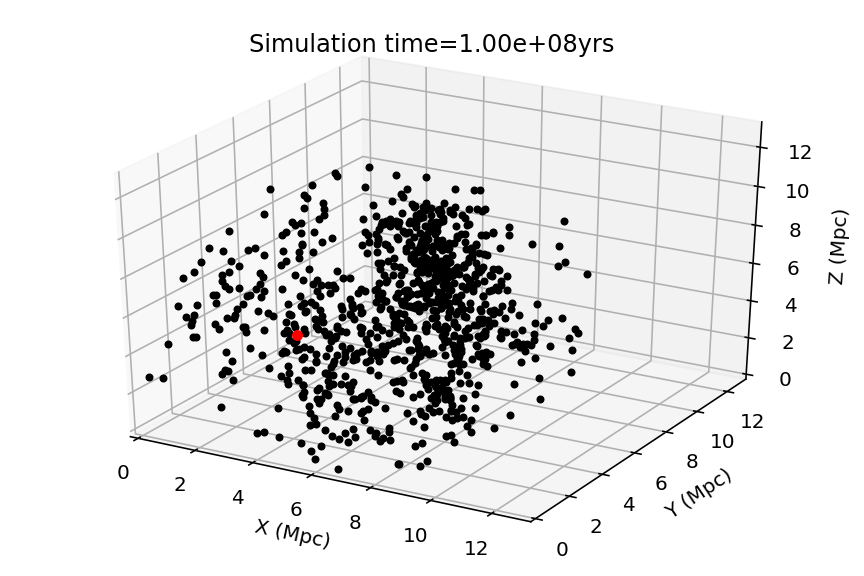

<IPython.core.display.Javascript object>


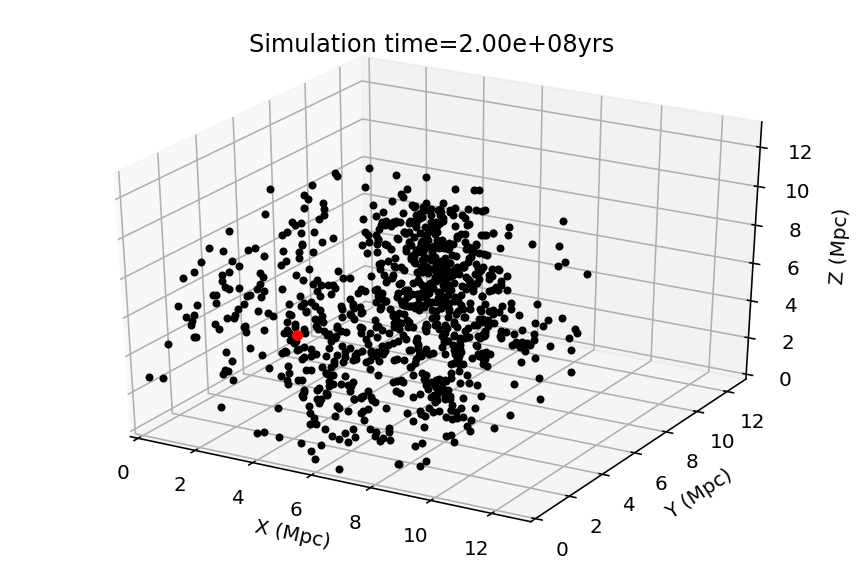

<IPython.core.display.Javascript object>


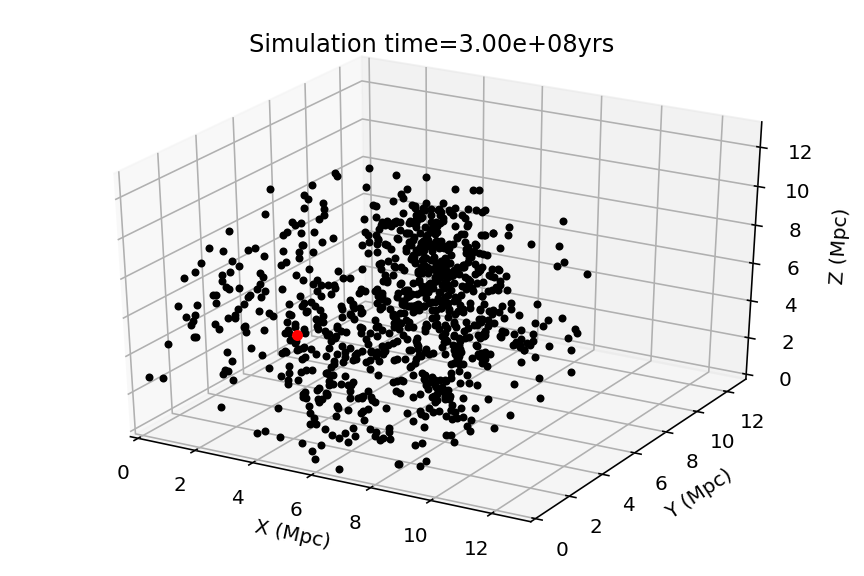

<IPython.core.display.Javascript object>


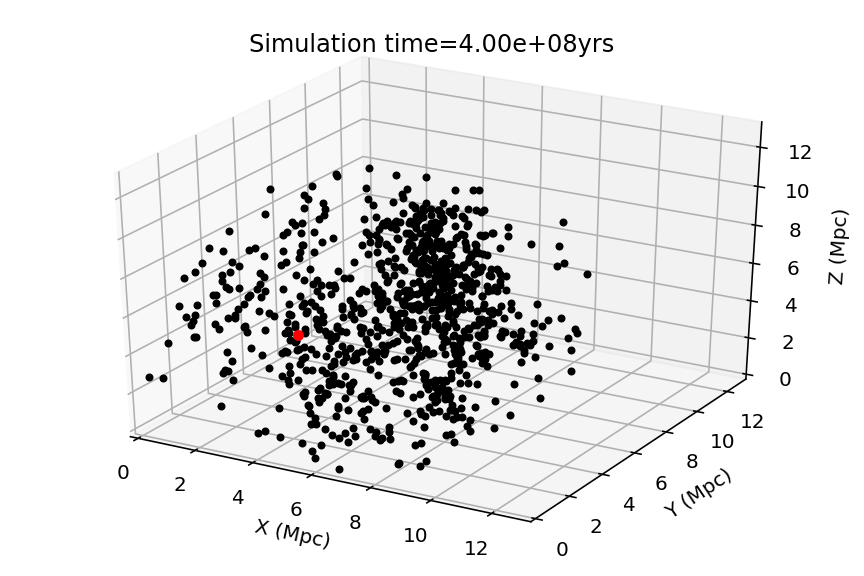

<IPython.core.display.Javascript object>


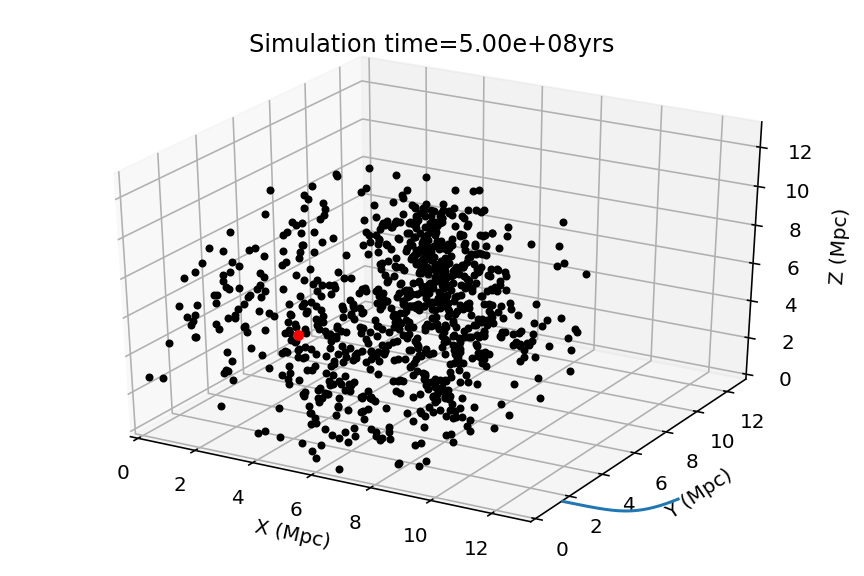

In [104]:
for i in range(0, 6):
    plot_from_file('galaxy_pos_000'+str(i)+'00.txt', 'Simulation time='+'{:.2e}'.format(int(time[i*100]/3.154e+7))+'yrs', 'plot_'+str(i)+'.png')

## Plot the time it took for the galaxies to reach a separation of 3 Mpc

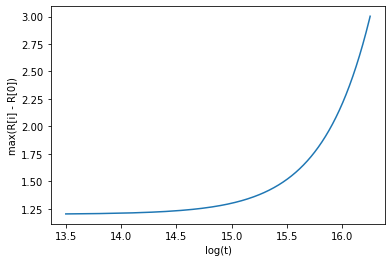

In [109]:
%matplotlib inline
plt.xlabel('log(t)')
plt.ylabel('max(R[i] - R[0])')
plt.plot(np.log10(time[1:]), mag_change)
plt.savefig('t_vs_maxsep.png')

[[2.10404731e+00 1.45830055e-02 7.23985767e+00]
 [3.05144503e+00 7.67599226e-04 5.11170934e+00]
 [5.83096850e+00 2.40231830e-02 7.62924566e-01]
 ...
 [5.97307335e+00 9.92819451e+00 8.42193805e+00]
 [8.25605477e+00 9.96321900e+00 1.73905885e+00]
 [1.00000000e+00 5.00000000e+00 5.00000000e+00]]
[[2.10404747e+00 1.45829119e-02 7.23985767e+00]
 [3.05144521e+00 7.67526610e-04 5.11170934e+00]
 [5.83096865e+00 2.40232082e-02 7.62924566e-01]
 ...
 [5.97307319e+00 9.92819454e+00 8.42193805e+00]
 [8.25605462e+00 9.96321910e+00 1.73905885e+00]
 [1.00000000e+00 5.00000000e+00 5.00000000e+00]]
0
10


KeyboardInterrupt: 

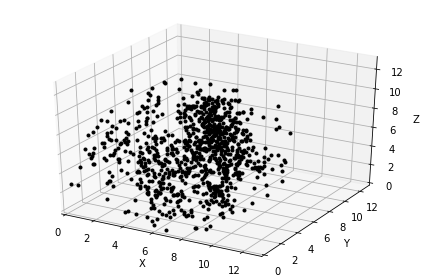

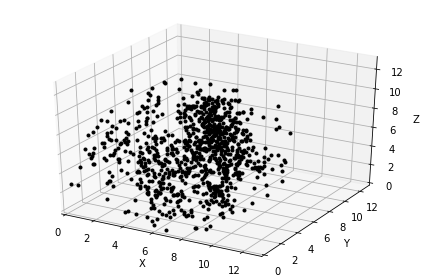

In [143]:
galaxy_init = 'galaxies0.npy'
galaxy_step = 'galaxies1.npy'
gal_past = np.load(galaxy_init)
gal_past = np.vstack((gal_past, [1,5,5]))
gal_current = np.load(galaxy_step)
gal_current = np.vstack((gal_current, [1,5,5]))
gal_global = gal_current

num_steps = 1000
mag_change = []
time = [0]

step_size = bh.step_size

for i in range(0, num_steps):
    
    change = abs(np.subtract(gal_current, gal_global))
    
    mag_change.append(np.max(np.sqrt(change*change)))
    time.append(time[i] + step_size)
    
    if mag_change[i] > 3:
        sys.exit("The simulation has advanced far enough that a particle \
             has moved a Mpc")
    
    ## Calculate the acceleration of each galaxy.
    accel = bh.calc_accel(gal_current, np.full(len(gal_current), 1e12))
    
    ## Update the positions of each galaxy.
    pos = bh.calc_position(gal_current, gal_past, accel)
    
    ## The current timestep will become the n-1 timestep.
    gal_past = gal_current
    
    ## The updated position will become the n timestep.
    gal_current = pos
    
    ## Every 100 iterations, output a plot of the data and the 
    ## positional data for post processing.
    if i % 10 == 0:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.set_xlim(0,13)
        ax.set_zlim(0,13)
        ax.set_ylim(0,13)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.tight_layout()
        ax.plot(gal_current[:,0], gal_current[:,1], gal_current[:,2], '.',color='k')
        plt.savefig('plots_lyap_no_offset/galaxies_%06d.png' % i)
        
        np.savetxt('plots_lyap_no_offset/galaxy_pos_%06d.txt' % i, gal_current)
        
        print(i)

In [ ]:
galaxy_init = 'galaxies0.npy'
galaxy_step = 'galaxies1.npy'
gal_past = np.load(galaxy_init)
offset = random.uniform(0, 0.001)
gal_past = np.vstack((gal_past, [1+offset,5+offset,5+offset]))
gal_current = np.load(galaxy_step)
gal_current = np.vstack((gal_current, [1+offset,5+offset,5+offset]))
gal_global = gal_current

num_steps = 1000
mag_change = []
time = [0]

step_size = bh.step_size

for i in range(0, num_steps):
    
    change = abs(np.subtract(gal_current, gal_global))
    
    mag_change.append(np.max(np.sqrt(change*change)))
    time.append(time[i] + step_size)
    
    if mag_change[i] > 3:
        sys.exit("The simulation has advanced far enough that a particle \
             has moved a Mpc")
    
    ## Calculate the acceleration of each galaxy.
    accel = bh.calc_accel(gal_current, np.full(len(gal_current), 1e12))
    
    ## Update the positions of each galaxy.
    pos = bh.calc_position(gal_current, gal_past, accel)
    
    ## The current timestep will become the n-1 timestep.
    gal_past = gal_current
    
    ## The updated position will become the n timestep.
    gal_current = pos
    
    ## Every 100 iterations, output a plot of the data and the 
    ## positional data for post processing.
    if i % 10 == 0:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.set_xlim(0,13)
        ax.set_zlim(0,13)
        ax.set_ylim(0,13)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.tight_layout()
        ax.plot(gal_current[:,0], gal_current[:,1], gal_current[:,2], '.',color='k')
        plt.savefig('plots_lyap_offset/galaxies_%06d.png' % i)
        
        np.savetxt('plots_lyap_offset/galaxy_pos_%06d.txt' % i, gal_current)
        
        print(i)

In [137]:
x = np.array([[1,2,3],[1,2,3]])

In [138]:
x_new = np.array([1,3,4])

In [140]:
y = np.vstack((x, x_new))

In [141]:
y

array([[1, 2, 3],
       [1, 2, 3],
       [1, 3, 4]])